In [195]:
import networkx as nx
import numpy as np
import csv
import matplotlib
import matplotlib.pylab as plt
import community
import matplotlib.cm as cm
%matplotlib inline

# DCSBM Community Detection Analysis of a Cardiovascular Disease Comorbidity Network

#### Note: The Actual DCSBM Clustering is done in "DCSBM.R". All analysis of clusters is done in this file.

reading the network file : ComNet_all.csv

number of nodes, n  = 1474
number of edges, m  = 21867
mean degree,    <k> = 29.67
clustering coefficient, C     =  0.19
mean geodesic distance, <ell> =  2.08


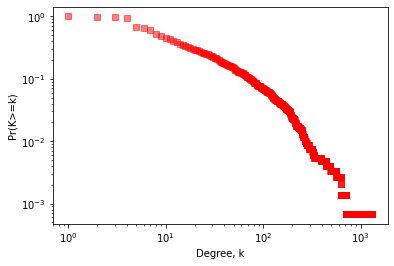

In [197]:
def drawGz(G,z):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)

    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    nsize  = 600
    flabel = True

    if G.order() > 50:
        nsize  = 100
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return


def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return
fname1 = 'ComNet_all.csv'

# read in the network file (an edge list)
print(f'reading the network file : {fname1}\n')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=str)  # import as a simple graph, index nodes by integers (not strings)

n = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
kmean = 2*m/n
C = nx.transitivity(G)
ellmean = nx.average_shortest_path_length(G)
degrees = nx.degree(G)
kis = [k for _,k in degrees]

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

plot_CCDF(kis)


In [198]:
# import DCSBM clusters created in R and assign node to corresponding cluster
def createClusterArray(G, fname):
    clusters = {}
    m = np.loadtxt(open(fname, "rb"), delimiter=",")
    z = {}

    m = m.tolist()
    node_labels = list(G.nodes().keys())

    for j in range(len(m)):
        z[node_labels[j]] = int(m[j])
        if int(m[j]) in clusters:
            clusters[int(m[j])][node_labels[j]] = int(m[j]) #set value to group number
        else:
            clusters[int(m[j])] = {node_labels[j]: int(m[j])}

    temp = []

    for cluster in clusters:
        temp.append(clusters[cluster])

    clusters = temp #create array of clusters 0 - 4
    return clusters

Module 0 - top page ranked node:  ('Q24.8', 0.010536499416847393)
Module 1 - top page ranked node:  ('I49.8', 0.0179630266364829)
Module 2 - top page ranked node:  ('Z01.7', 0.03660243012915032)
Module 3 - top page ranked node:  ('I09.1', 0.005492450706993287)
Module 4 - top page ranked node:  ('N18.9', 0.015027429320813952) 
 
 



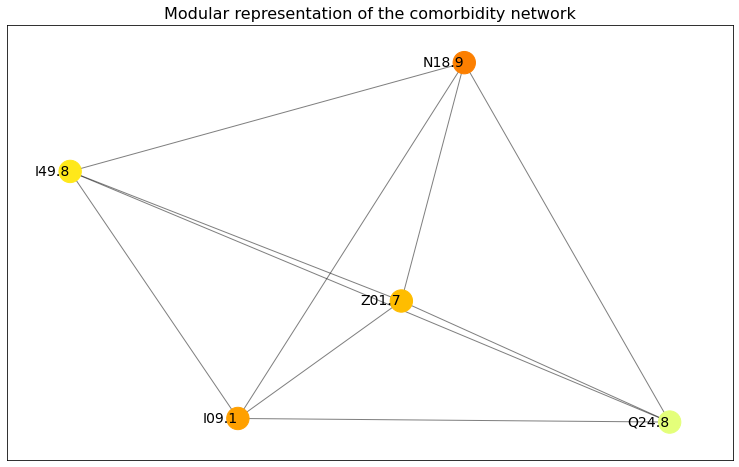

In [320]:
fname = "DCSBM_Clusters.csv"
out = createClusterArray(G,fname)

best_simulated_partition = {}
sim_mod0 = []
sim_mod1 = []
sim_mod2 = []
sim_mod3 = []
sim_mod4 = []
for i in range(len(out)):
    for node in out[i]:
        best_simulated_partition[node] = i
        if(i == 0):
            sim_mod0.append(node)
        if(i == 1):
            sim_mod1.append(node)
        if(i == 2):
            sim_mod2.append(node)
        if(i == 3):
            sim_mod3.append(node)
        if(i == 4):
            sim_mod4.append(node)

sim_page_rank = nx.pagerank(G, personalization=best_simulated_partition)

def compute_max_pagerank(module_nodes, page_rank_dict):
    maxi = 0
    tup = tuple()
    for node in module_nodes:
        if(maxi < page_rank_dict[node]):
            maxi = page_rank_dict[node]
            tup = (node, page_rank_dict[node])
    return tup

print('Module 0 - top page ranked node: ', compute_max_pagerank(sim_mod0, sim_page_rank))
print('Module 1 - top page ranked node: ', compute_max_pagerank(sim_mod1, sim_page_rank))
print('Module 2 - top page ranked node: ', compute_max_pagerank(sim_mod2, sim_page_rank))
print('Module 3 - top page ranked node: ', compute_max_pagerank(sim_mod3, sim_page_rank))
print('Module 4 - top page ranked node: ', compute_max_pagerank(sim_mod4, sim_page_rank), '\n \n \n')

parentLabels = []
parentNodes = {}

parentLabels.append(compute_max_pagerank(sim_mod0, sim_page_rank)[0])
parentNodes[0] = compute_max_pagerank(sim_mod0, sim_page_rank)[0]
parentLabels.append(compute_max_pagerank(sim_mod1, sim_page_rank)[0])
parentNodes[1] = compute_max_pagerank(sim_mod1, sim_page_rank)[0]
parentLabels.append(compute_max_pagerank(sim_mod2, sim_page_rank)[0])
parentNodes[2] = compute_max_pagerank(sim_mod2, sim_page_rank)[0]
parentLabels.append(compute_max_pagerank(sim_mod3, sim_page_rank)[0])
parentNodes[3] = compute_max_pagerank(sim_mod3, sim_page_rank)[0]
parentLabels.append(compute_max_pagerank(sim_mod4, sim_page_rank)[0])
parentNodes[4] = compute_max_pagerank(sim_mod4, sim_page_rank)[0]

fig, ax = plt.subplots(1,figsize=(13,8))
sim_com_G = community.induced_graph(best_simulated_partition, G)
sim_com_G.remove_edges_from(nx.selfloop_edges(sim_com_G))
pos = nx.spring_layout(sim_com_G)
cmap = cm.get_cmap('Wistia', max(best_simulated_partition.values()) + 1)
nx.draw_networkx_nodes(sim_com_G, pos, ax=ax, node_size=500, cmap=cmap, node_color=[0,1,2,3,4], label=parentLabels)
nx.draw_networkx_edges(sim_com_G, pos,ax=ax, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_G, pos, labels=parentNodes, horizontalalignment='right', font_size = 14)
ax.set_title('Modular representation of the comorbidity network', color='black', size = 16)

fig.savefig('modules.png')

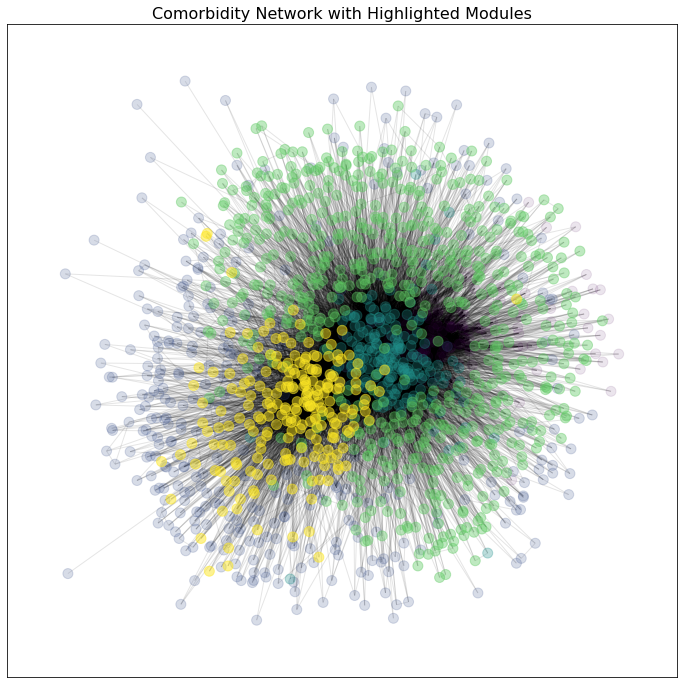

In [ ]:
#graphical view of the whole network with communities highlighted
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(best_simulated_partition.values()) + 1)
fig, ax = plt.subplots(1,figsize=(12,12))
alpha=[((x+1) / 10 )for x in list(best_simulated_partition.values())]
nx.draw_networkx_nodes(G, pos, best_simulated_partition.keys(), ax=ax, node_size=100,
                       cmap=cmap, node_color=list(best_simulated_partition.values()), alpha=alpha, label = list(best_simulated_partition.values()))
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.1)
ax.set_title('Comorbidity Network with Highlighted Modules', color='black', size=16)

plt.show()

In [311]:
# create subgraphs from each cluster

subgraphs = []

Gc = G.copy()

Gc.remove_node('Q24.8')
Gc.remove_node('I49.8')
Gc.remove_node('Z01.7')
Gc.remove_node('I09.1')
Gc.remove_node('N18.9')

i = 0
for cluster in clusters:
    subgraphs.append(Gc.subgraph(cluster))
    print("Number of Nodes in Cluster " + str(i) + ":",len(cluster))
    i += 1
    
#save each subgraph as edgelist in csv format in order to partition in DCSBM.R
i = 0
for subgraph in subgraphs:
    fname = "subgraph_" + str(i) + ".csv"
    nx.write_edgelist(subgraph, fname, delimiter=",")
    i += 1

Number of Nodes in Cluster 0: 110
Number of Nodes in Cluster 1: 335
Number of Nodes in Cluster 2: 192
Number of Nodes in Cluster 3: 619
Number of Nodes in Cluster 4: 218


In [279]:
# import DCSBM clusters created in R and assign node to corresponding cluster
def createSubclusterArray(G, fname):
    clusters = {}
    m = np.loadtxt(open(fname, "rb"), delimiter=",")
    z = {}

    m = m.tolist()
    node_labels = list(G.nodes().keys())

    for j in range(len(m)):
        z[node_labels[j]] = int(m[j])
        
    return z

In [300]:
def sub_analysis(cluster, partition, parent):
    subclusters = {}
    pageranks = nx.pagerank(cluster, personalization=partition)
    m = list(partition.values())
    z = {}
    node_labels = list(cluster.nodes().keys())

    for j in range(len(m)):
        z[node_labels[j]] = int(m[j])
        if int(m[j]) in subclusters:
            subclusters[int(m[j])][node_labels[j]] = pageranks[node_labels[j]]
        else:
            subclusters[int(m[j])] = {node_labels[j]: pageranks[node_labels[j]]}
    
    topnodes = []
    label = []
    label_dict = {}
    i = 0
    for subcluster in subclusters:
        topnodes.append([max(subclusters[subcluster], key=subclusters[subcluster].get), len(subclusters[subcluster])])
        label.append(max(subclusters[subcluster], key=subclusters[subcluster].get))
        label_dict[i] = max(subclusters[subcluster], key=subclusters[subcluster].get)
        i += 1
    label_dict[i] = parent
    return topnodes, label, label_dict             
                            

In [301]:
#import subgraph partitions created in DCSBM.R
G_cluster0 = nx.read_edgelist('./subgraph_0.csv', delimiter=',', nodetype=str) 
cluster0_partitions = createSubclusterArray(G_cluster0, "DCSBM_Subcluster0.csv")
sub_clusters_mod0, mod0_labels, mod0_labels_dict = sub_analysis(G_cluster0, cluster0_partitions,'Q24.8')
print('Module 0 sub clusters', sub_clusters_mod0, '\n')

G_cluster1 = nx.read_edgelist('./subgraph_1.csv', delimiter=',', nodetype=str) 
cluster1_partitions = createSubclusterArray(G_cluster1, "DCSBM_Subcluster1.csv")
sub_clusters_mod1, mod1_labels, mod1_labels_dict = sub_analysis(G_cluster1, cluster1_partitions, 'I49.8')
print('Module 1 sub clusters', sub_clusters_mod1, '\n')

G_cluster2 = nx.read_edgelist('./subgraph_2.csv', delimiter=',', nodetype=str) 
cluster2_partitions = createSubclusterArray(G_cluster2, "DCSBM_Subcluster2.csv")
sub_clusters_mod2, mod2_labels, mod2_labels_dict = sub_analysis(G_cluster2, cluster2_partitions,'Z01.7')
print('Module 2 sub clusters', sub_clusters_mod2, '\n')

G_cluster3 = nx.read_edgelist('./subgraph_3.csv', delimiter=',', nodetype=str) 
cluster3_partitions = createSubclusterArray(G_cluster3, "DCSBM_Subcluster3.csv")
sub_clusters_mod3, mod3_labels, mod3_labels_dict = sub_analysis(G_cluster3, cluster3_partitions, 'I09.1')
print('Module 3 sub clusters', sub_clusters_mod3, '\n')


G_cluster4 = nx.read_edgelist('./subgraph_4.csv', delimiter=',', nodetype=str) 
cluster4_partitions = createSubclusterArray(G_cluster4, "DCSBM_Subcluster4.csv")
sub_clusters_mod4, mod4_labels, mod4_labels_dict = sub_analysis(G_cluster4, cluster4_partitions, 'N18.9')
print('Module 4 sub clusters', sub_clusters_mod4, '\n')


Module 0 sub clusters [['Q21.1', 25], ['Q21.0', 28], ['I27.0', 30], ['Q26.2', 16], ['Q20.8', 10]] 

Module 1 sub clusters [['I10.X', 58], ['N04.X', 5], ['Q10.5', 3], ['I11.9', 10], ['N87.9', 28], ['N00.9', 3], ['Z96.1', 4], ['Q61.2', 13]] 

Module 2 sub clusters [['I48.X', 50], ['I25.8', 55], ['I70.9', 41], ['I24.8', 42]] 

Module 3 sub clusters [['I36.1', 166], ['J86.0', 8], ['I71.6', 23], ['C34.8', 6], ['Z45.8', 45], ['D35.2', 10], ['D81.8', 8]] 

Module 4 sub clusters [['Z49.1', 41], ['E11.2', 20], ['Z49.2', 32], ['Z52.4', 30], ['E79.0', 21], ['Z96.0', 19], ['E14.2', 16], ['I13.1', 18], ['Z99.2', 20]] 



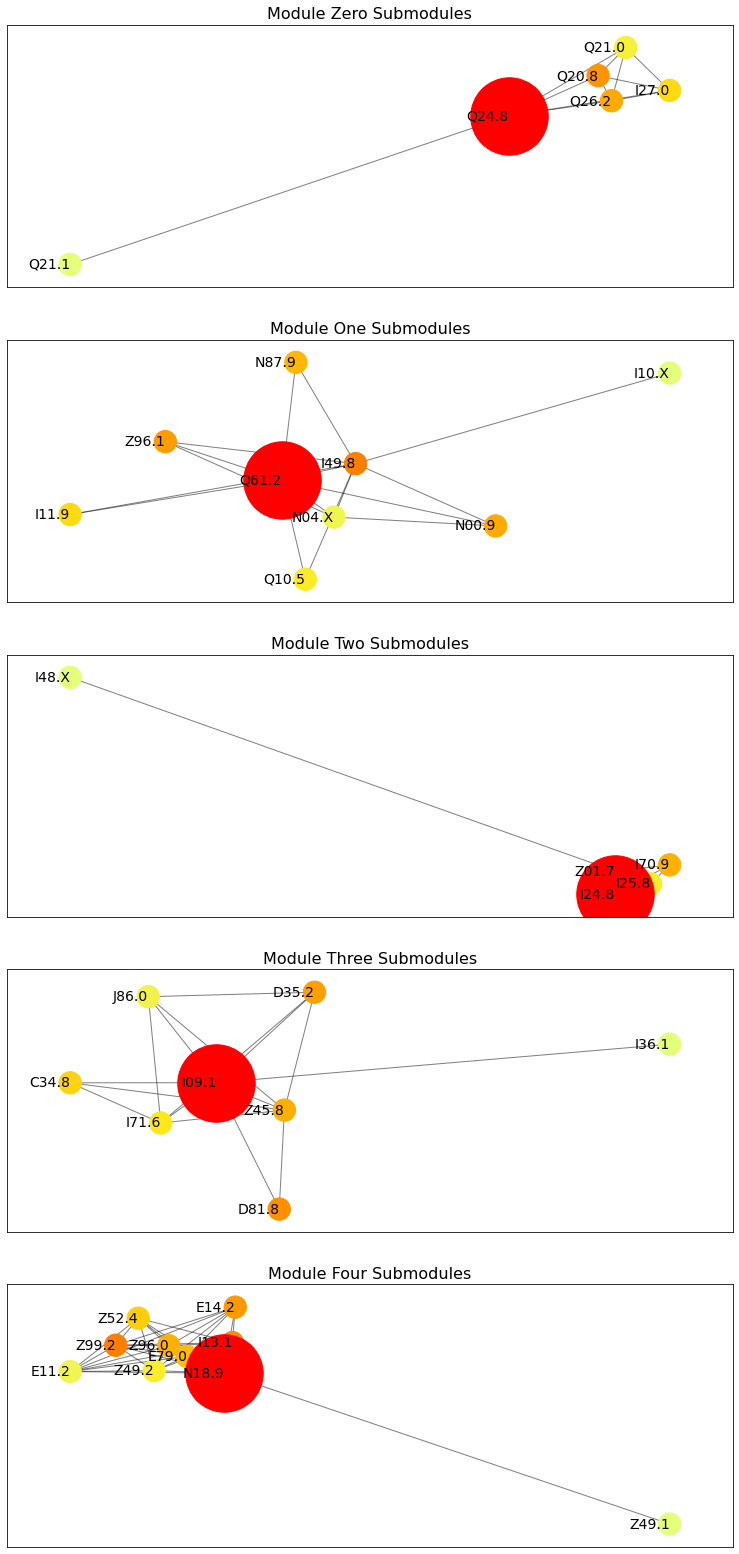

In [321]:
fig, ax = plt.subplots(5,figsize=(13,28))
sim_com_cluster0 = community.induced_graph(cluster0_partitions, G_cluster0)
sim_com_cluster0.remove_edges_from(nx.selfloop_edges(sim_com_cluster0))
sim_com_cluster0.add_node(5)
sim_com_cluster0.add_edges_from([(0,5), (1,5), (2,5), (3,5), (4,5)])
pos = nx.spring_layout(sim_com_cluster0)
cmap = cm.get_cmap('Wistia', max(cluster0_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster0, pos, ax=ax[0], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5], node_color=[0,1,2,3,4,5], label=mod0_labels)
nx.draw_networkx_nodes(sim_com_cluster0, pos, ax=ax[0], nodelist=[5], node_size=6000, cmap=cmap, node_color = ['red'], label=['Q24.8'])
nx.draw_networkx_edges(sim_com_cluster0, pos,ax=ax[0], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster0, pos, labels=mod0_labels_dict, horizontalalignment='right', font_size = 14, ax=ax[0])
ax[0].set_title('Module Zero Submodules', color='black', size = 16)



sim_com_cluster1 = community.induced_graph(cluster1_partitions, G_cluster1)
sim_com_cluster1.remove_edges_from(nx.selfloop_edges(sim_com_cluster1))
sim_com_cluster1.add_node(8)
sim_com_cluster1.add_edges_from([(0,8), (1,8), (2,8), (3,8), (4,8), (5,8), (6,8), (7,8)])
pos = nx.spring_layout(sim_com_cluster1)
cmap = cm.get_cmap('Wistia', max(cluster1_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster1, pos, ax=ax[1], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5,6,7,8],node_color=[0,1,2,3,4,5,6,7,8], label=mod1_labels)
nx.draw_networkx_nodes(sim_com_cluster1, pos, ax=ax[1], nodelist=[7], node_size=6000, cmap=cmap, node_color = ['red'], label=['I49.8'])
nx.draw_networkx_edges(sim_com_cluster1, pos,ax=ax[1], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster1, pos, labels=mod1_labels_dict, horizontalalignment='right', font_size = 14, ax=ax[1])
ax[1].set_title('Module One Submodules', color='black', size = 16)


sim_com_cluster2 = community.induced_graph(cluster2_partitions, G_cluster2)
sim_com_cluster2.remove_edges_from(nx.selfloop_edges(sim_com_cluster2))
sim_com_cluster2.add_node(4)
sim_com_cluster2.add_edges_from([(0,4), (1,4), (2,4), (3,4)])
pos = nx.spring_layout(sim_com_cluster2)
cmap = cm.get_cmap('Wistia', max(cluster2_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster2, pos, ax=ax[2], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4],node_color=[0,1,2,3,4], label=mod2_labels)
nx.draw_networkx_nodes(sim_com_cluster2, pos, ax=ax[2], nodelist=[3], node_size=6000, cmap=cmap, node_color = ['red'], label=['Z01.7'])
nx.draw_networkx_edges(sim_com_cluster2, pos,ax=ax[2], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster2, pos, labels=mod2_labels_dict, horizontalalignment='right', font_size = 14, ax=ax[2])
ax[2].set_title('Module Two Submodules', color='black', size = 16)

sim_com_cluster3 = community.induced_graph(cluster3_partitions, G_cluster3)
sim_com_cluster3.remove_edges_from(nx.selfloop_edges(sim_com_cluster3))
sim_com_cluster3.add_node(7)
sim_com_cluster3.add_edges_from([(0,7), (1,7), (2,7), (3,7), (4,7), (5,7), (6,7)])
pos = nx.spring_layout(sim_com_cluster3)
cmap = cm.get_cmap('Wistia', max(cluster3_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster3, pos, ax=ax[3], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5,6,7],node_color=[0,1,2,3,4,5,6,7], label=mod3_labels)
nx.draw_networkx_nodes(sim_com_cluster3, pos, ax=ax[3], nodelist=[7], node_size=6000, cmap=cmap, node_color = ['red'], label=['I09.1'])
nx.draw_networkx_edges(sim_com_cluster3, pos,ax=ax[3], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster3, pos, labels=mod3_labels_dict, horizontalalignment='right', font_size = 14, ax=ax[3])
ax[3].set_title('Module Three Submodules', color='black', size = 16)

sim_com_cluster4 = community.induced_graph(cluster4_partitions, G_cluster4)
sim_com_cluster4.remove_edges_from(nx.selfloop_edges(sim_com_cluster4))
sim_com_cluster4.add_node(9)
sim_com_cluster4.add_edges_from([(0,9), (1,9), (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9)])
pos = nx.spring_layout(sim_com_cluster4)
cmap = cm.get_cmap('Wistia', max(cluster4_partitions.values()) + 2)
nx.draw_networkx_nodes(sim_com_cluster4, pos, ax=ax[4], node_size=500, cmap=cmap, nodelist=[0,1,2,3,4,5,6,7,8],node_color=[0,1,2,3,4,5,6,7,8], label=mod4_labels)
nx.draw_networkx_nodes(sim_com_cluster4, pos, ax=ax[4], nodelist=[9], node_size=6000, cmap=cmap, node_color = ['red'], label=['N18.9'])
nx.draw_networkx_edges(sim_com_cluster4, pos,ax=ax[4], alpha=0.5, edge_color='black')
nx.draw_networkx_labels(sim_com_cluster4, pos, labels=mod4_labels_dict, horizontalalignment='right', font_size = 14, ax=ax[4])
ax[4].set_title('Module Four Submodules', color='black', size = 16)

fig.savefig('all_modules.png')


### Summary of Comorbidity Network Clusters


| Cluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- | 
| 0 | 110 | Q24.8 | Other forms of chronic ischemic heart disease | 
| 1 | 335 | I49.8 | Other specified cardiac arrhythmias | 
| 2 | 192 | Z01.7| Laboratory examination | 
| 3 | 619 | I09.1 | Rheumatic diseases of endocardium, valve unspecified | 
| 4 | 218 | N18.9 | Chronic kidney disease, unspecified | 

### Cluster Zero Analysis - This Module is Represented by Q24.8 (Other forms of chronic ischemic heart disease)
| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- | 
| 0 | 25 | Q21.1 | Atrial septal defect | 
| 1 | 28 | Q21.0 | Ventricular septal defect | 
| 2 | 30 | I27.0 | Primary pulmonary hypertension | 
| 3 | 16 | Q26.2 | Total anomalous pulmonary venous connection | 
| 4 | 10 | Q20.8 | Other congenital malformations of cardiac chambers and connections | 


### Cluster One Analysis - This Module is Represented by I49.8 (Other specified cardiac arrhythmias)
| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- | 
| 0 | 58 | I10.X  | Essential (primary) hypertension |
| 1 | 5 | N04.X | Nephrotic syndrome with minor glomerular abnormality |
| 2 | 3 | Q10.5 | Congenital stenosis and stricture of lacrimal duct |
| 3 | 10 | I11.9 | Hypertensive heart disease without heart failure |
| 4 | 28 | N87.9 | Dysplasia of cervix uteri, unspecified |
| 5 | 3 | N00.9 | Acute nephritic syndrome with unspecified morphologic changes |
| 6 | 4 | Z96.1 |  Hypertensive heart disease without heart failure |
| 7 | 13 | Q61.2 |  Polycystic kidney, adult type |

### Cluster Two Analysis - This Module is Represented by Z01.7 (Laboratory examination)

| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- |
| 0 | 50 | I48.X | Atrial fibrillation and flutter | 
| 1 | 55 | I25.8 | Other forms of chronic ischemic heart disease | 
| 2 | 41 | I70.9 | Generalized and unspecified atherosclerosis | 
| 3 | 42 | I24.8 | Other forms of acute ischaemic heart disease | 

### Cluster Three Analysis - This Module is Represented by I09.1 (Rheumatic diseases of endocardium, valve unspecified)

| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- |
| 0 | 166 | I36.1 | Nonrheumatic tricuspid (valve) insufficiency |
| 1 | 8 | J86.0 | Pyothorax with fistula |
| 2 | 23 | I71.6 | Thoracoabdominal aortic aneurysm, without rupture |
| 3 | 6 | C34.8 | Malignant neoplasm: Overlapping lesion of bronchus and lung |
| 4 | 45 | Z45.8 | Adjustment and management of other implanted devices |
| 5 | 10 | D35.2 | Benign neoplasm of pituitary gland |
| 6 | 8 | D81.8 | Other combined immunodeficiencies |

### Cluster Four Analysis - This Module is Represented by N18.9 (Chronic kidney disease, unspecified)

| Subcluster | Number of Nodes | Highest Page Ranked Node| ICD 10 Translation |
| --- | --- | --- | --- |
| 0 | 41 | Z49.1 | Encounter for fitting and adjustment of extracorporeal dialysis catheter |
| 1 | 20 | E11.2 | Type 2 diabetes mellitus with kidney complications |
| 2 | 32 | Z49.2 |  Encounter for fitting and adjustment of peritoneal dialysis catheter |
| 3 | 30 | Z52.4 | Kidney donor |
| 4 | 21 | E79.0 | Hyperuricemia without signs of inflammatory arthritis and tophaceous disease |
| 5 | 19 | Z96.0 | Presence of urogenital implants |
| 6 | 16 | E14.2 | Unspecified diabetes mellitus with renal complications |
| 7 | 18 | I13.1 | Hypertensive heart and renal disease with renal failure |
| 8 | 20 | Z99.2 | Dependence on renal dialysis |

